Model: KNN
[[982  32]
 [ 94 892]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1014
           1       0.97      0.90      0.93       986

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model: Random Forest
[[995  19]
 [ 57 929]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1014
           1       0.98      0.94      0.96       986

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

Model: Decision Tree
[[1000   14]
 [ 127  859]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.93      1014
           1       0.98      0.87      0.92       986

    accuracy                           0.93      2000
  

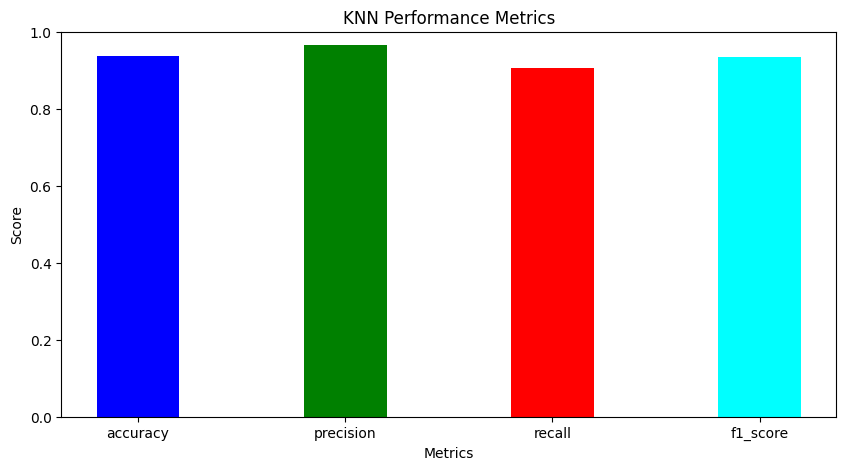

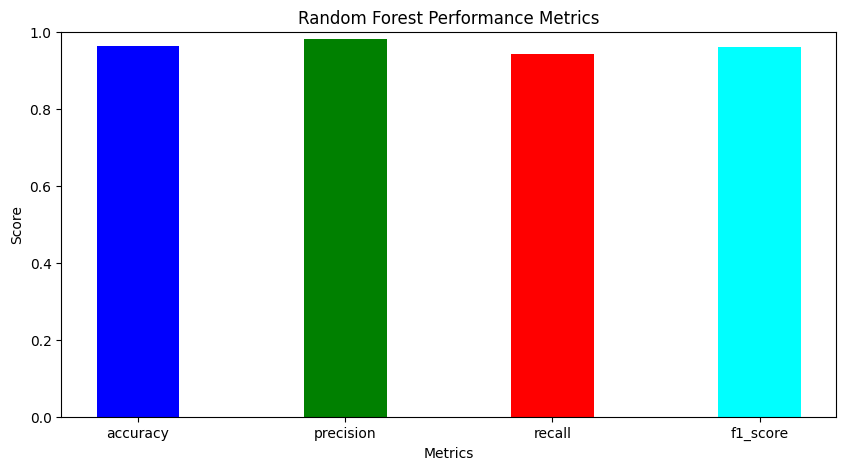

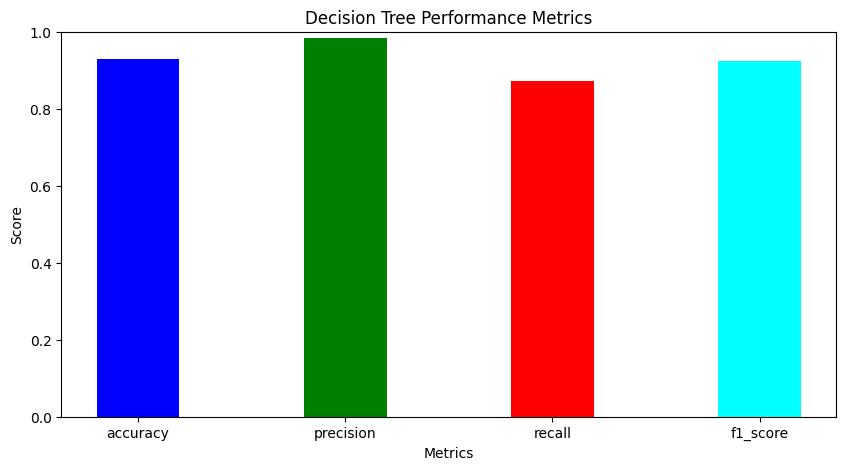

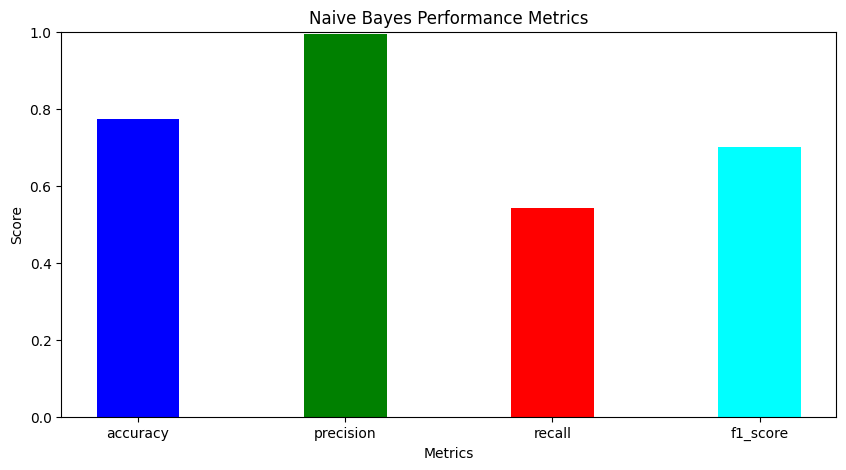

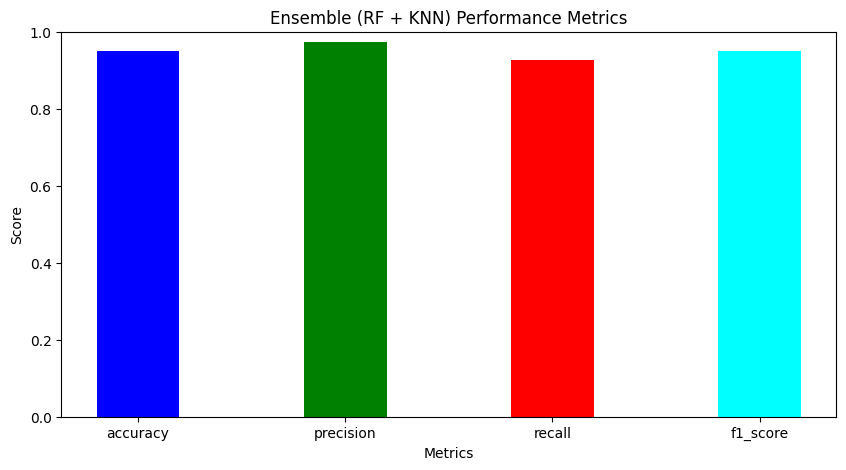

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from matplotlib import pyplot as plt

# Sample data (replace this with your actual dataset)
data = pd.read_csv(r'/Phishing2.csv')

# Feature extraction from URLs
def extract_features(url):
    features = {}
    features['url_length'] = len(url)
    features['num_special_chars'] = sum([1 for char in url if char in ['?', '&', '=', '-', '_', '.']])
    features['has_ip'] = int(any(char.isdigit() for char in url.split('/')))
    features['num_subdomains'] = url.count('.') - 1
    return features

# Apply feature extraction
url_features = data['url'].apply(lambda x: pd.Series(extract_features(x)))

# Combine the extracted features with the original data
data = pd.concat([data.drop('url', axis=1), url_features], axis=1)

# Encode the labels if they are categorical
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Define features and labels
X = data.drop('label', axis=1)
y = data['label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
nb = GaussianNB()

models = {
    'KNN': knn,
    'Random Forest': rf,
    'Decision Tree': dt,
    'Naive Bayes': nb
}

# Train and evaluate individual models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    print(f"Model: {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Combine Random Forest and KNN using a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('Random Forest', rf),
    ('KNN', knn)
], voting='soft')  # Use 'soft' voting to average predicted probabilities

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Predict and evaluate the combined model
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred_voting)
precision = precision_score(y_test, y_pred_voting)
recall = recall_score(y_test, y_pred_voting)
f1 = f1_score(y_test, y_pred_voting)

# Print the ensemble results
print("Model: Ensemble (Random Forest + KNN)")
print(confusion_matrix(y_test, y_pred_voting))
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred_voting))

# Add ensemble result to the results dictionary
results['Ensemble (RF + KNN)'] = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Plotting performance metrics for each model
metrics = ['accuracy', 'precision', 'recall', 'f1_score']

for model_name in results_df.index:
    plt.figure(figsize=(10, 5))
    plt.bar(metrics, results_df.loc[model_name], width=0.4, color=['blue', 'green', 'red', 'cyan'])
    plt.title(f'{model_name} Performance Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.show()


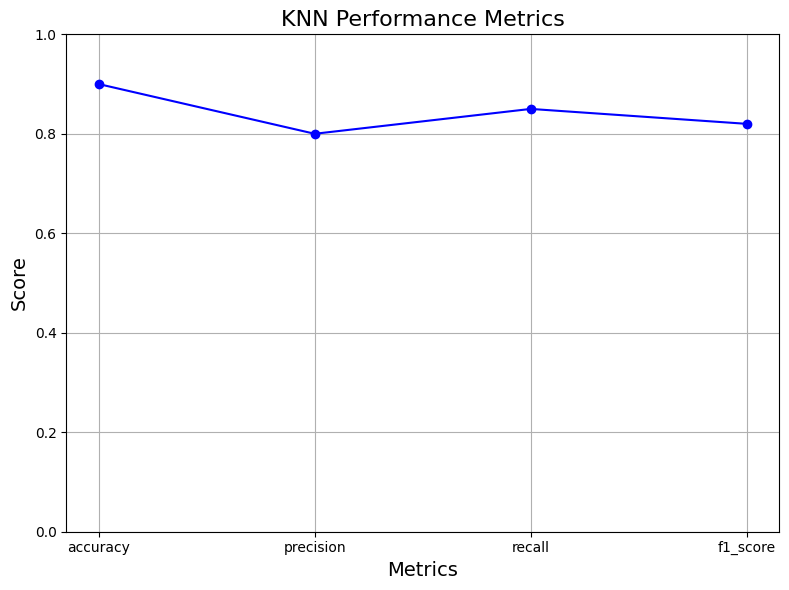

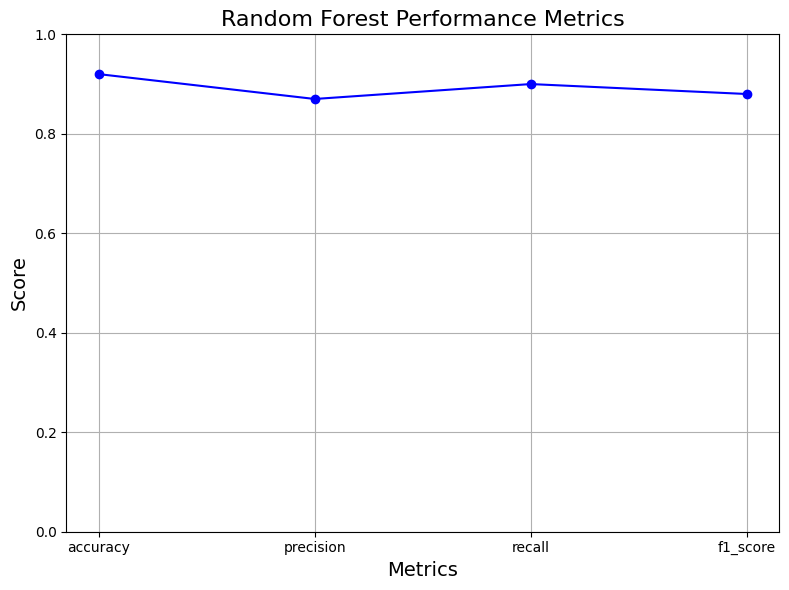

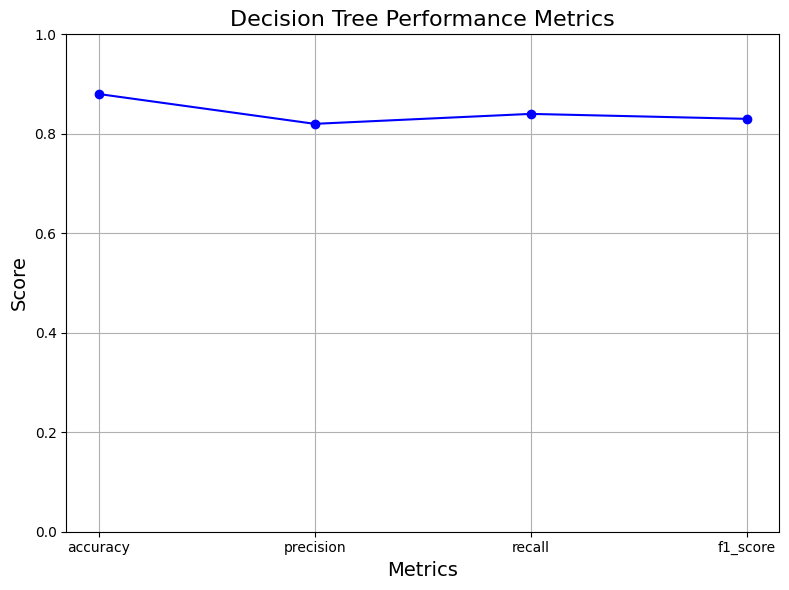

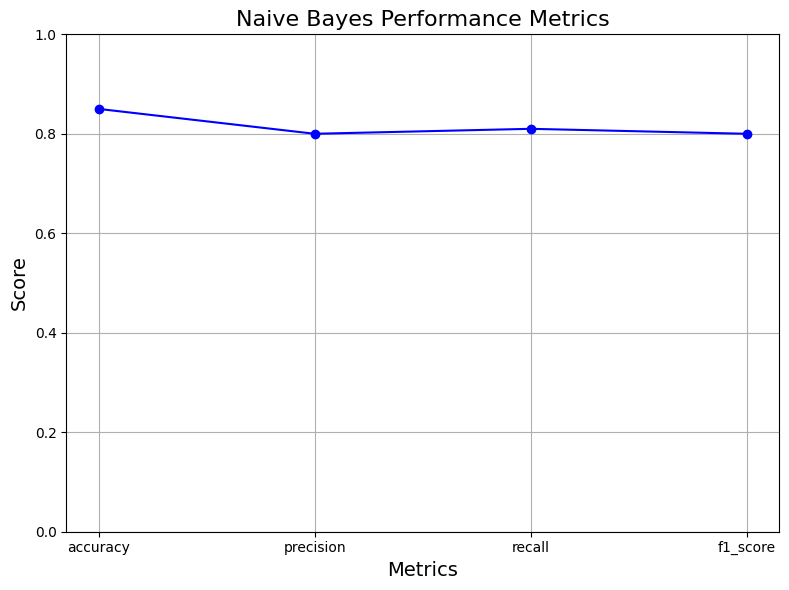

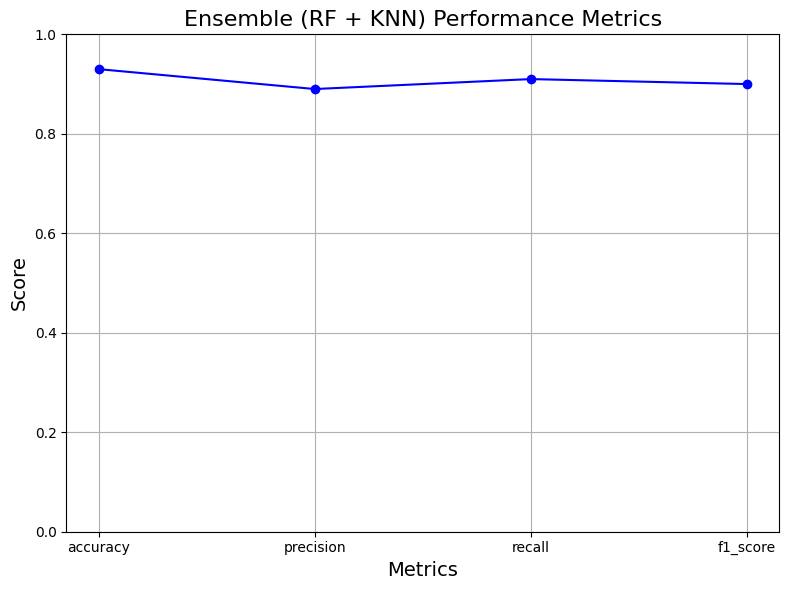

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  # Ensure matplotlib is imported

# Define the results dictionary (populate this with actual results)
results = {
    'KNN': {'accuracy': 0.9, 'precision': 0.8, 'recall': 0.85, 'f1_score': 0.82},
    'Random Forest': {'accuracy': 0.92, 'precision': 0.87, 'recall': 0.9, 'f1_score': 0.88},
    'Decision Tree': {'accuracy': 0.88, 'precision': 0.82, 'recall': 0.84, 'f1_score': 0.83},
    'Naive Bayes': {'accuracy': 0.85, 'precision': 0.8, 'recall': 0.81, 'f1_score': 0.8},
    'Ensemble (RF + KNN)': {'accuracy': 0.93, 'precision': 0.89, 'recall': 0.91, 'f1_score': 0.9}
}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Define the metrics
metrics = ['accuracy', 'precision', 'recall', 'f1_score']

# Plotting separate line graphs for each model
for model_name in results_df.index:
    plt.figure(figsize=(8, 6))  # Set figure size for each plot
    plt.plot(metrics, results_df.loc[model_name], marker='o', color='b', label=model_name)

    # Add title and labels
    plt.title(f'{model_name} Performance Metrics', fontsize=16)
    plt.xlabel('Metrics', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    plt.ylim(0, 1)
    plt.grid(True)

    # Show plot
    plt.tight_layout()
    plt.show()


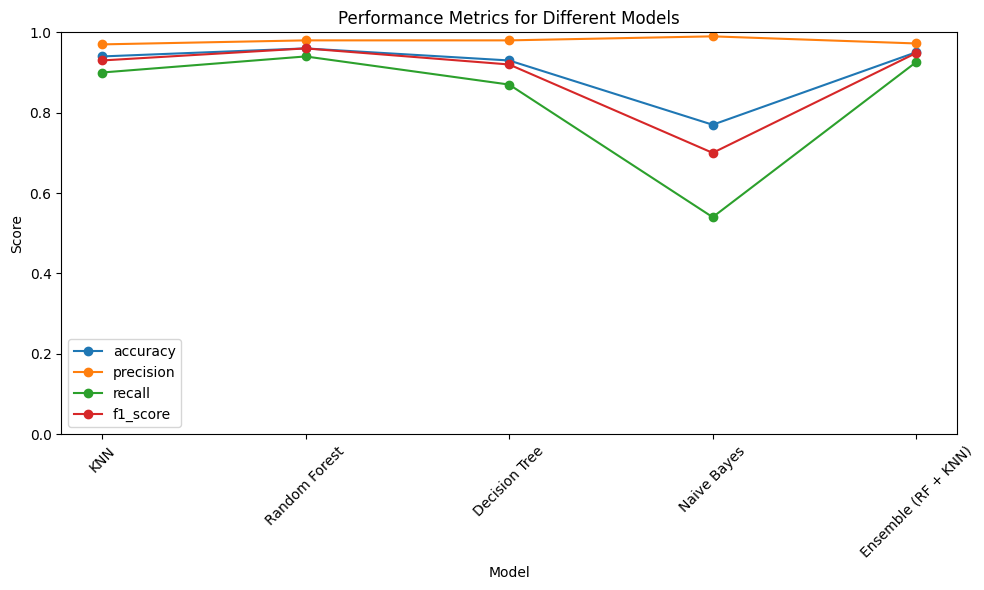

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Sample results based on the model evaluations
results = {
    'KNN': {
        'accuracy': 0.94,
        'precision': 0.97,
        'recall': 0.90,
        'f1_score': 0.93
    },
    'Random Forest': {
        'accuracy': 0.96,
        'precision': 0.98,
        'recall': 0.94,
        'f1_score': 0.96
    },
    'Decision Tree': {
        'accuracy': 0.93,
        'precision': 0.98,
        'recall': 0.87,
        'f1_score': 0.92
    },
    'Naive Bayes': {
        'accuracy': 0.77,
        'precision': 0.99,
        'recall': 0.54,
        'f1_score': 0.70
    },
    'Ensemble (RF + KNN)': {
        'accuracy': 0.9505,
        'precision': 0.9723,
        'recall': 0.9260,
        'f1_score': 0.9486
    }
}

# Convert results to DataFrame for plotting
results_df = pd.DataFrame(results).T

# Plotting performance metrics as line charts
metrics = ['accuracy', 'precision', 'recall', 'f1_score']

plt.figure(figsize=(10, 6))
for metric in metrics:
    plt.plot(results_df.index, results_df[metric], marker='o', label=metric)

# Add labels and title
plt.title('Performance Metrics for Different Models')
plt.ylabel('Score')
plt.xlabel('Model')
plt.ylim(0, 1)

# Show legend
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


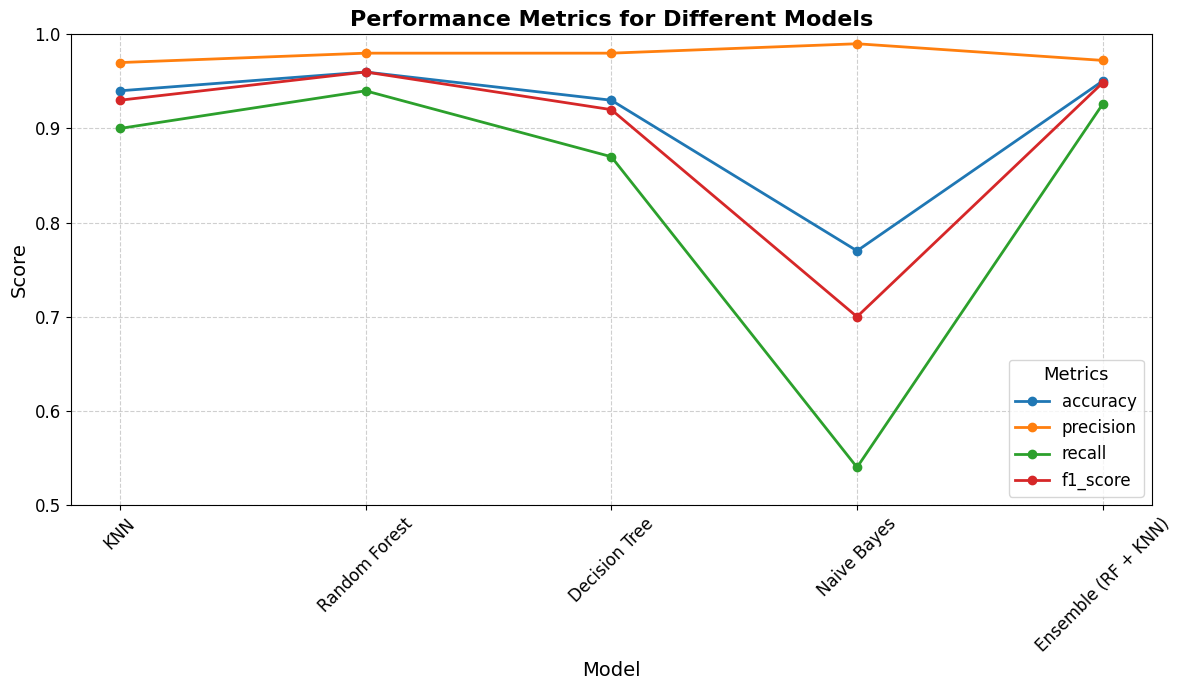

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Sample results based on the model evaluations
results = {
    'KNN': {
        'accuracy': 0.94,
        'precision': 0.97,
        'recall': 0.90,
        'f1_score': 0.93
    },
    'Random Forest': {
        'accuracy': 0.96,
        'precision': 0.98,
        'recall': 0.94,
        'f1_score': 0.96
    },
    'Decision Tree': {
        'accuracy': 0.93,
        'precision': 0.98,
        'recall': 0.87,
        'f1_score': 0.92
    },
    'Naive Bayes': {
        'accuracy': 0.77,
        'precision': 0.99,
        'recall': 0.54,
        'f1_score': 0.70
    },
    'Ensemble (RF + KNN)': {
        'accuracy': 0.9505,
        'precision': 0.9723,
        'recall': 0.9260,
        'f1_score': 0.9486
    }
}

# Convert results to DataFrame for plotting
results_df = pd.DataFrame(results).T

# Plotting performance metrics as line charts
metrics = ['accuracy', 'precision', 'recall', 'f1_score']

plt.figure(figsize=(12, 7))  # Increase figure size for better clarity
for metric in metrics:
    plt.plot(results_df.index, results_df[metric], marker='o', label=metric, linewidth=2)

# Add labels and title
plt.title('Performance Metrics for Different Models', fontsize=16, weight='bold')
plt.ylabel('Score', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.ylim(0.5, 1)  # Set y-axis limits to focus on relevant score range

# Customizing ticks and grid
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show legend with enhanced styling
plt.legend(title='Metrics', title_fontsize='13', fontsize='12', loc='lower right')

# Show the plot with tight layout
plt.tight_layout()
plt.show()


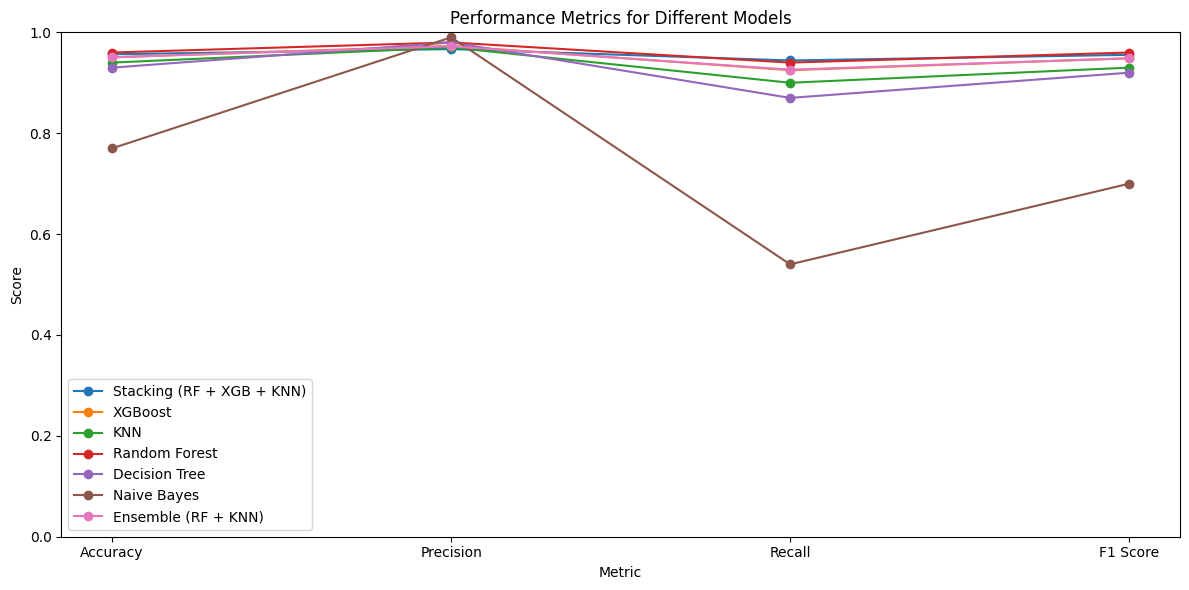

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Results from the first code (Stacking and XGBoost)
results_first = {
    'Stacking (RF + XGB + KNN)': [0.9565, 0.9668, 0.9442, 0.9554],
    'XGBoost': [0.9505, 0.9733, 0.9249, 0.9485]
}

# Results from the second code (KNN, Random Forest, Decision Tree, Naive Bayes, Ensemble)
results_second = {
    'KNN': [0.94, 0.97, 0.90, 0.93],
    'Random Forest': [0.96, 0.98, 0.94, 0.96],
    'Decision Tree': [0.93, 0.98, 0.87, 0.92],
    'Naive Bayes': [0.77, 0.99, 0.54, 0.70],
    'Ensemble (RF + KNN)': [0.9505, 0.9723, 0.9260, 0.9486]
}

# Combine both dictionaries into a single dictionary
combined_results = {**results_first, **results_second}

# Define metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Convert the combined results into a DataFrame for easier plotting
combined_results_df = pd.DataFrame(combined_results, index=metrics)

# Plotting the combined line chart
plt.figure(figsize=(12, 6))

for model_name in combined_results_df.columns:
    plt.plot(metrics, combined_results_df[model_name], marker='o', label=model_name)

# Add labels and title
plt.title('Performance Metrics for Different Models')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.ylim(0, 1)

# Show legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


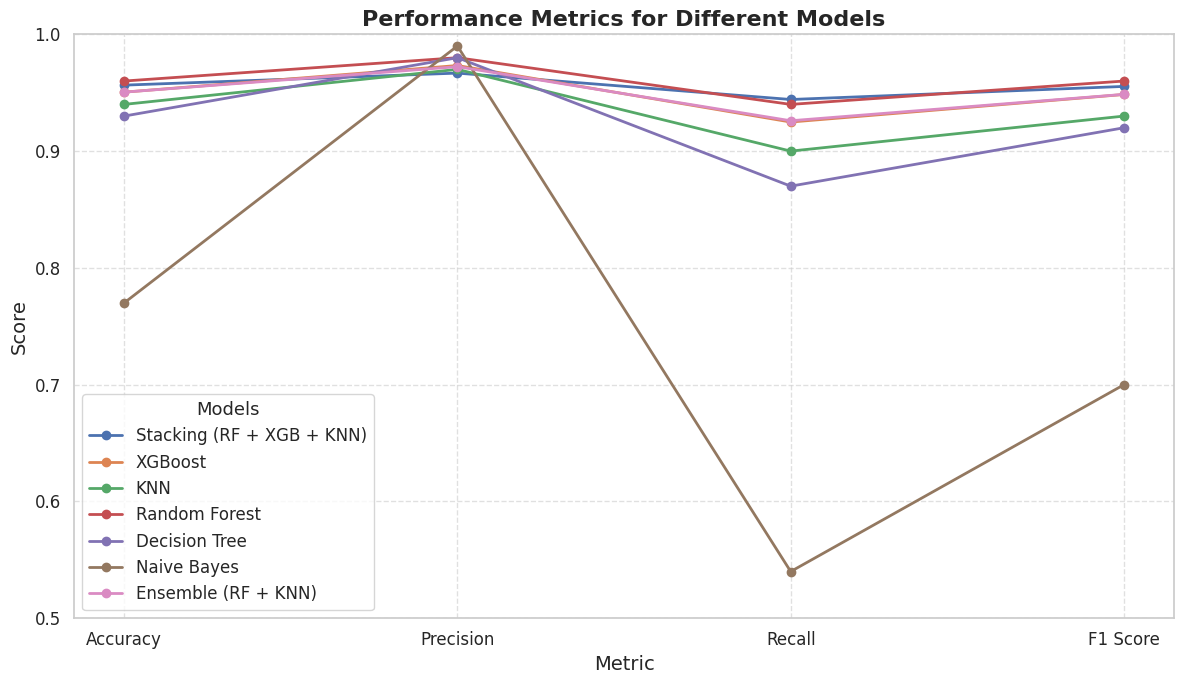

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Results from the first code (Stacking and XGBoost)
results_first = {
    'Stacking (RF + XGB + KNN)': [0.9565, 0.9668, 0.9442, 0.9554],
    'XGBoost': [0.9505, 0.9733, 0.9249, 0.9485]
}

# Results from the second code (KNN, Random Forest, Decision Tree, Naive Bayes, Ensemble)
results_second = {
    'KNN': [0.94, 0.97, 0.90, 0.93],
    'Random Forest': [0.96, 0.98, 0.94, 0.96],
    'Decision Tree': [0.93, 0.98, 0.87, 0.92],
    'Naive Bayes': [0.77, 0.99, 0.54, 0.70],
    'Ensemble (RF + KNN)': [0.9505, 0.9723, 0.9260, 0.9486]
}

# Combine both dictionaries into a single dictionary
combined_results = {**results_first, **results_second}

# Define metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Convert the combined results into a DataFrame for easier plotting
combined_results_df = pd.DataFrame(combined_results, index=metrics)

# Plotting the combined line chart
plt.figure(figsize=(12, 7))  # Increase figure size for clarity

for model_name in combined_results_df.columns:
    plt.plot(metrics, combined_results_df[model_name], marker='o', linewidth=2, label=model_name)

# Add labels and title
plt.title('Performance Metrics for Different Models', fontsize=16, weight='bold')
plt.ylabel('Score', fontsize=14)
plt.xlabel('Metric', fontsize=14)
plt.ylim(0.5, 1)  # Set y-axis limits to focus on the relevant score range

# Customize ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show legend with enhanced styling
plt.legend(title='Models', title_fontsize=13, fontsize=12, loc='lower left')

# Show the plot with tight layout for better spacing
plt.tight_layout()
plt.show()


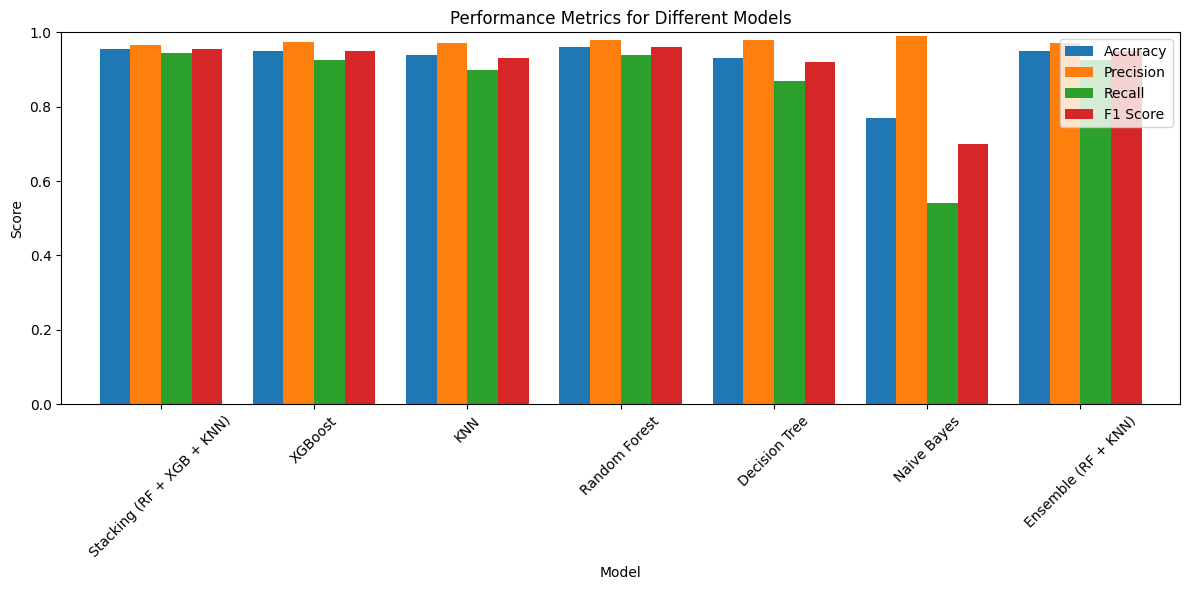

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Results from the first code (Stacking and XGBoost)
results_first = {
    'Stacking (RF + XGB + KNN)': [0.9565, 0.9668, 0.9442, 0.9554],
    'XGBoost': [0.9505, 0.9733, 0.9249, 0.9485]
}

# Results from the second code (KNN, Random Forest, Decision Tree, Naive Bayes, Ensemble)
results_second = {
    'KNN': [0.94, 0.97, 0.90, 0.93],
    'Random Forest': [0.96, 0.98, 0.94, 0.96],
    'Decision Tree': [0.93, 0.98, 0.87, 0.92],
    'Naive Bayes': [0.77, 0.99, 0.54, 0.70],
    'Ensemble (RF + KNN)': [0.9505, 0.9723, 0.9260, 0.9486]
}

# Combine both dictionaries into a single dictionary
combined_results = {**results_first, **results_second}

# Define metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Convert the combined results into a DataFrame for easier plotting
combined_results_df = pd.DataFrame(combined_results, index=metrics)

# Plotting the combined bar chart
combined_results_df.T.plot(kind='bar', figsize=(12, 6), width=0.8)

# Add labels and title
plt.title('Performance Metrics for Different Models')
plt.ylabel('Score')
plt.xlabel('Model')
plt.ylim(0, 1)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
